<a href="https://www.kaggle.com/code/rajeshsingh3474/walmart-sales-prediction?scriptVersionId=151610972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv


In [2]:
df=pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4769,34,21-01-2011,891025.39,0,39.57,3.017,127.440484,10.398
378,3,11-11-2011,407764.25,0,61.70,3.297,221.411752,7.197
2686,19,30-03-2012,1327139.35,0,43.47,4.098,137.726193,7.943
6097,43,04-11-2011,641905.37,0,59.08,3.332,209.516265,10.148
3882,28,02-07-2010,1399960.15,0,91.98,3.105,126.139200,14.180
5737,41,04-06-2010,1305068.10,0,60.13,2.700,189.422658,7.363
1360,10,01-07-2011,1751369.75,0,95.36,3.842,129.089400,8.257
6275,44,06-07-2012,358461.58,0,79.23,3.630,130.719633,5.407
609,5,22-10-2010,284988.27,0,70.96,2.725,212.416993,6.768
4689,33,06-04-2012,275911.97,0,70.75,4.282,131.037548,7.396



# **Checking Data**

In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
dup=df.duplicated().sum()
dup

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and some visualisation

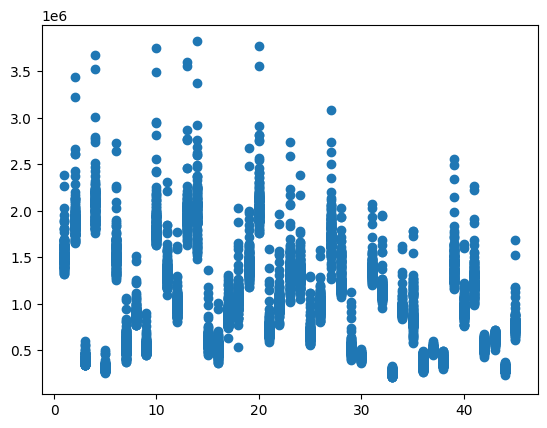

In [9]:
plt.scatter(df["Store"],df["Weekly_Sales"])

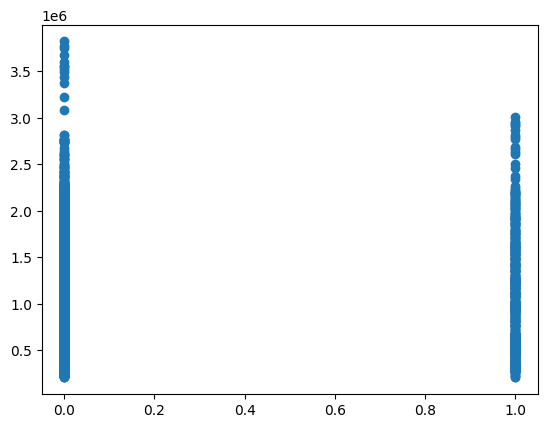

In [10]:
plt.scatter(df["Holiday_Flag"],df["Weekly_Sales"])

<BarContainer object of 6435 artists>

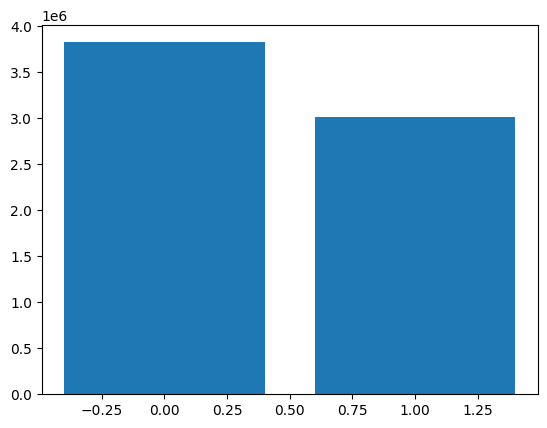

In [11]:
plt.bar(df["Holiday_Flag"],df["Weekly_Sales"])

/tmp/ipykernel_20/1613797856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weekly_Sales"])


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

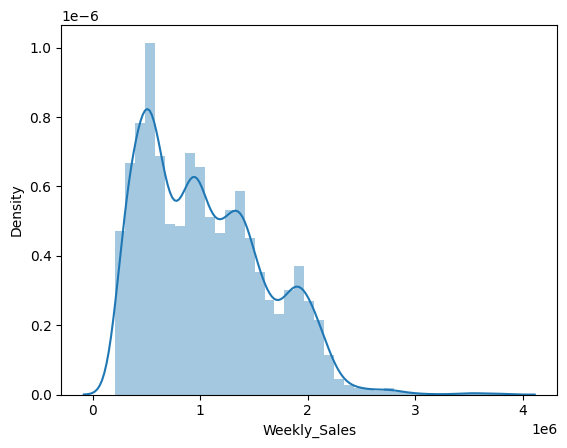

In [12]:
sns.distplot(df["Weekly_Sales"])

<Axes: >

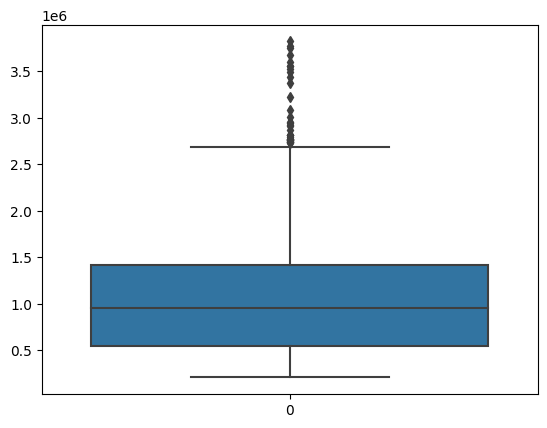

In [13]:
sns.boxplot(df["Weekly_Sales"])

In [14]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

(array([ 424., 1016.,  708.,  555.,  576., 1204., 1043.,  658.,  203.,
          48.]),
 array([2.472 , 2.6716, 2.8712, 3.0708, 3.2704, 3.47  , 3.6696, 3.8692,
        4.0688, 4.2684, 4.468 ]),
 <BarContainer object of 10 artists>)

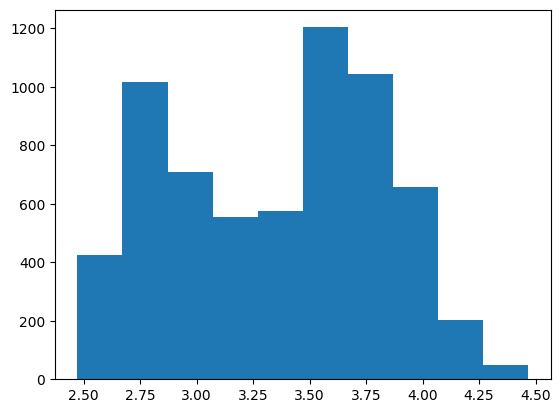

In [15]:
plt.hist(df["Fuel_Price"])

[]

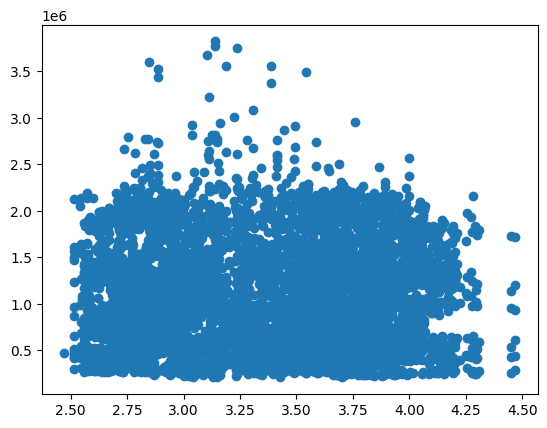

In [16]:
plt.scatter(df["Fuel_Price"],df["Weekly_Sales"])
plt.plot()

In [17]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

[]

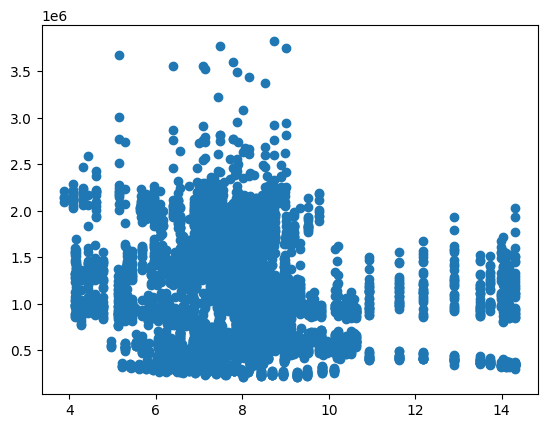

In [18]:
plt.scatter(df["Unemployment"],df["Weekly_Sales"])
plt.plot()

In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [20]:
df.rename({"Holiday_Flag":"Is_Holiday"},axis=1,inplace=True)

In [21]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [22]:
df.head()

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data preparation


In [23]:
df["Date"]=pd.to_datetime(df["Date"], format = "%d-%m-%Y")

In [24]:
df["Month"]=df["Date"].dt.month

In [25]:
df["Year"]=df["Date"].dt.year

In [26]:
df["Quarter"]=df["Date"].dt.quarter

In [27]:
df.head()

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1


In [28]:
df['week'] = df['Date'].dt.isocalendar().week

In [29]:
df['day_of_week'] = df['Date'].dt.day_name()

In [30]:
df['month_name'] = df['Date'].dt.month_name()

In [31]:
def get_season(quarter):

    '''this function is to get season according to quarter column'''

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [32]:
df['season'] = df['Quarter'].apply(get_season)

In [33]:
df.sample(5)

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,week,day_of_week,month_name,season
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,12,2011,4,51,Friday,December,Autumn
1079,8,2011-08-05,892393.77,0,85.15,3.684,218.949299,6.425,8,2011,3,31,Friday,August,Summer
831,6,2012-04-27,1456221.10,0,71.50,3.814,223.225487,5.964,4,2012,2,17,Friday,April,Spring
6141,43,2012-09-07,663814.18,1,84.99,3.730,213.799099,9.285,9,2012,3,36,Friday,September,Summer
2471,18,2010-11-12,1081322.12,0,43.17,2.961,132.978323,9.331,11,2010,4,45,Friday,November,Autumn


# Data visualisation with feature columns


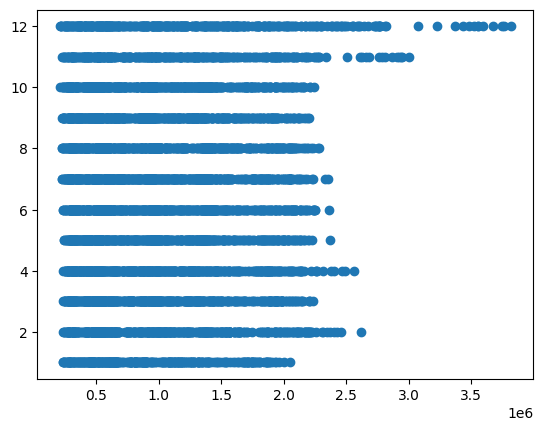

In [34]:
plt.scatter(df["Weekly_Sales"],df["Month"])

sales are high in december

<BarContainer object of 6435 artists>

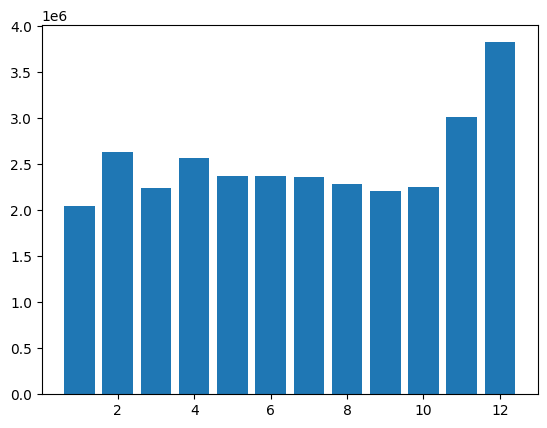

In [35]:
plt.bar(df["Month"],df["Weekly_Sales"])

In [36]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Quarter', 'week',
       'day_of_week', 'month_name', 'season'],
      dtype='object')

<BarContainer object of 6435 artists>

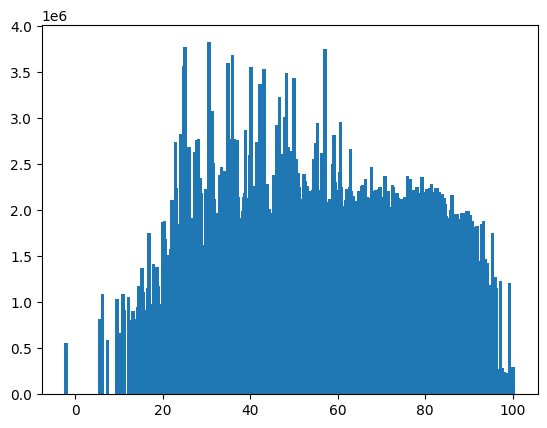

In [37]:
plt.bar(df["Temperature"],df["Weekly_Sales"])

<BarContainer object of 6435 artists>

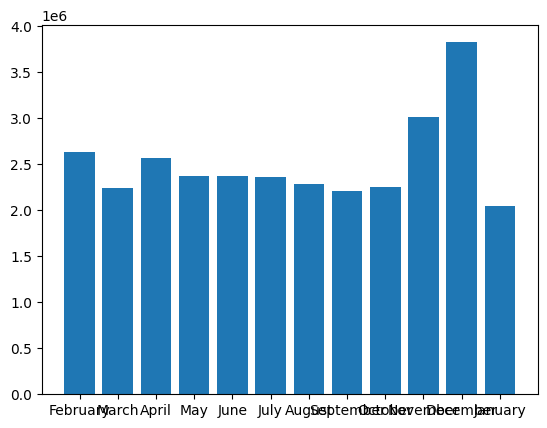

In [38]:
plt.bar(df["month_name"],df["Weekly_Sales"])

<BarContainer object of 6435 artists>

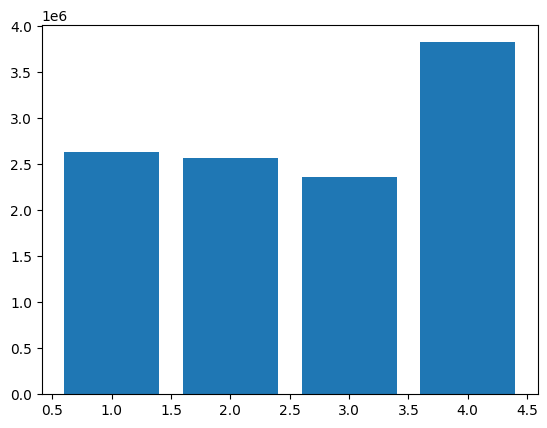

In [39]:
plt.bar(df["Quarter"],df["Weekly_Sales"])

In [40]:
d=df['Is_Holiday'].value_counts()
d

Is_Holiday
0    5985
1     450
Name: count, dtype: int64

In [41]:
d=df['Year'].value_counts()
d

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

In [42]:
d=df['Quarter'].value_counts()
d

Quarter
3    1800
2    1755
1    1485
4    1395
Name: count, dtype: int64

In [43]:
d=df['Month'].value_counts()
d

Month
4     630
7     630
3     585
6     585
8     585
9     585
10    585
2     540
5     540
12    450
11    360
1     360
Name: count, dtype: int64

<Axes: xlabel='month_name', ylabel='count'>

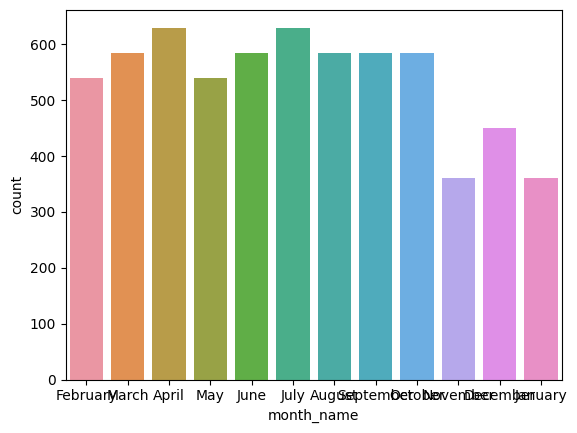

In [44]:
sns.countplot(df["Month"],x=df["month_name"])

In [45]:
df["day_of_week"].value_counts()

day_of_week
Friday    6435
Name: count, dtype: int64

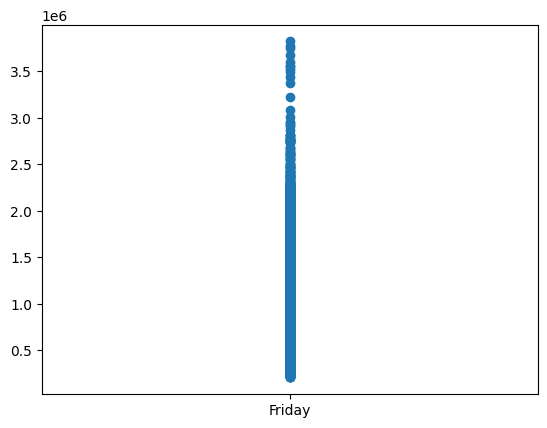

In [46]:
plt.scatter(df["day_of_week"],df["Weekly_Sales"])

In [47]:
df.head()

,Store,Date,Weekly_Sales,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,week,day_of_week,month_name,season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1,5,Friday,February,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1,6,Friday,February,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1,7,Friday,February,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1,8,Friday,February,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1,9,Friday,March,Winter


In [48]:
# df.drop(columns=["Day_name"],inplace=True)

In [49]:
df.shape

(6435, 15)

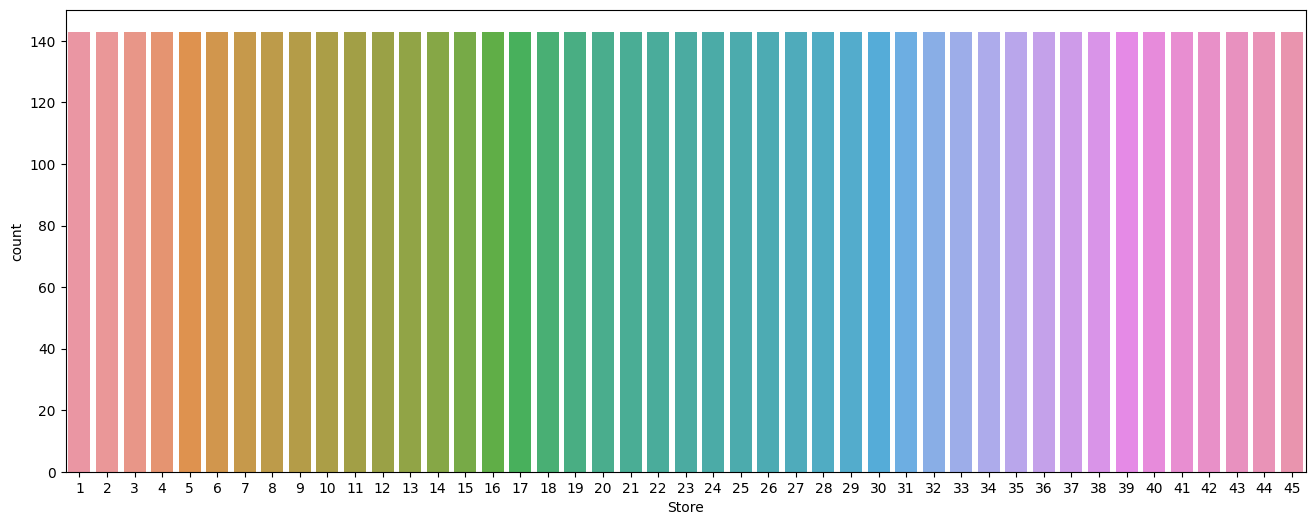

In [50]:
plt.figure(figsize=(16, 6))
sns.countplot(data = df, x = 'Store')
plt.show()

In [51]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Quarter', 'week',
       'day_of_week', 'month_name', 'season'],
      dtype='object')

In [52]:
x=df.groupby('Is_Holiday')["Weekly_Sales"].mean()
x

Is_Holiday
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [53]:
df.groupby('Quarter')["Weekly_Sales"].mean()


Quarter
1    1.006136e+06
2    1.040806e+06
3    1.023251e+06
4    1.128774e+06
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Is_Holiday', ylabel='Weekly_Sales'>

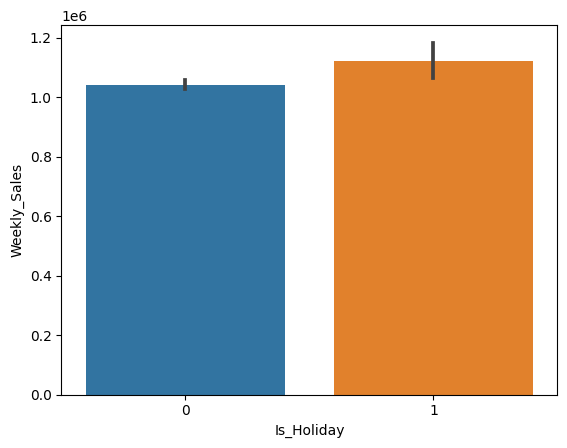

In [54]:
sns.barplot(data=df,x=df["Is_Holiday"],y=df["Weekly_Sales"])

In [55]:
df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

In [56]:
df.groupby('Year')['Weekly_Sales'].sum().sort_values(ascending = False)


Year
2011    2.448200e+09
2010    2.288886e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

/tmp/ipykernel_20/3093838890.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df,


<Axes: xlabel='Year', ylabel='Weekly_Sales'>

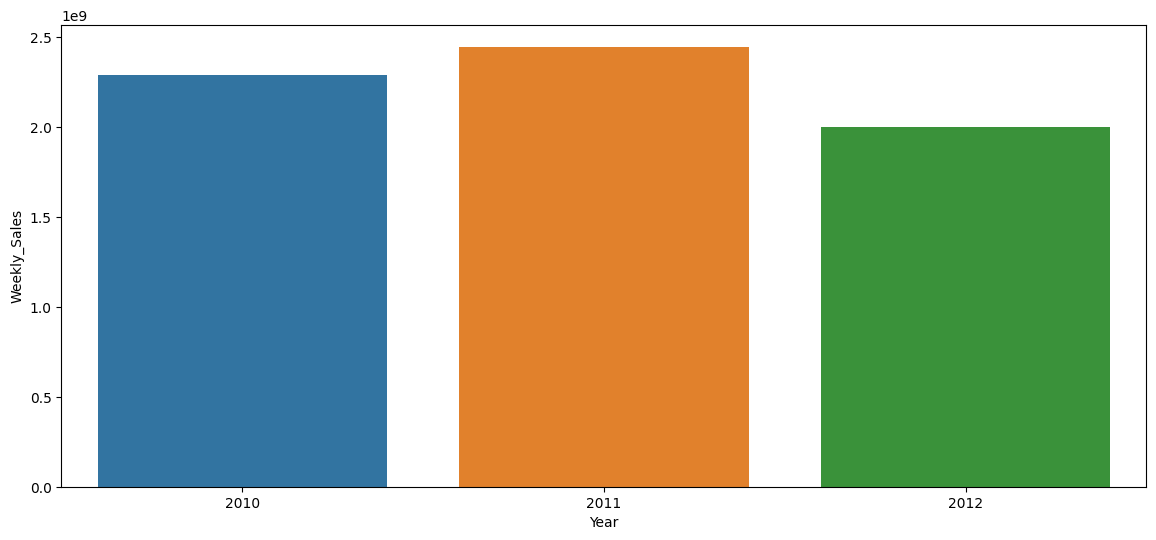

In [57]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'Year',
            y = 'Weekly_Sales',
            estimator = np.sum,
            ci = False)

/tmp/ipykernel_20/2737330626.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df,


<Axes: xlabel='Quarter', ylabel='Weekly_Sales'>

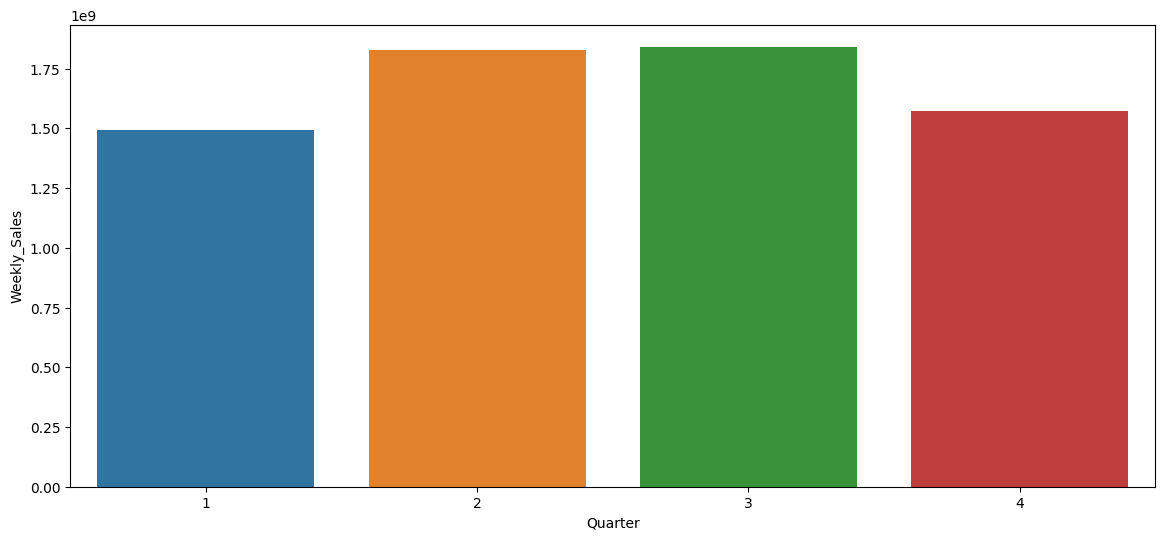

In [58]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'Quarter',
            y = 'Weekly_Sales',
            estimator = np.sum,
            ci = False)

/tmp/ipykernel_20/1415199149.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df,x="month_name",y="Weekly_Sales",estimator = np.sum,ci = False)


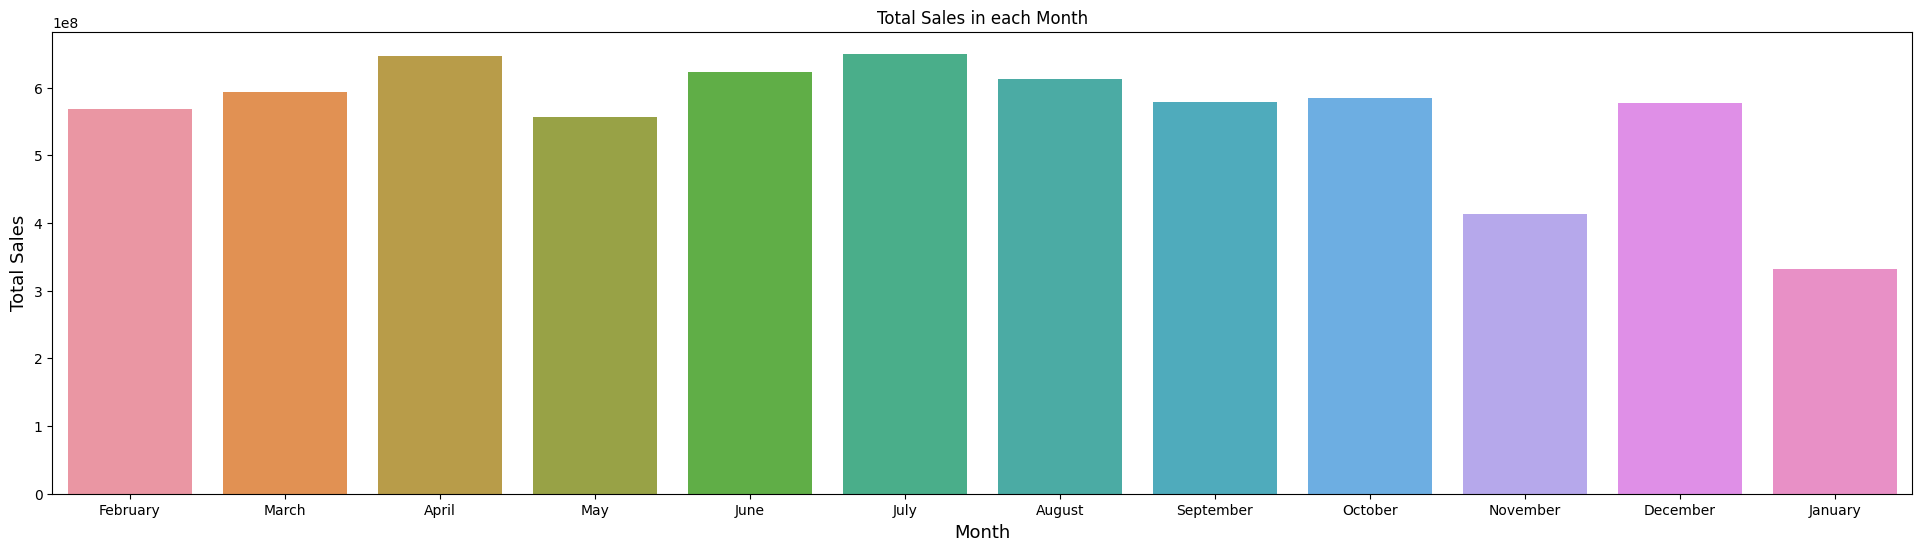

In [59]:
plt.figure(figsize = (24, 6))

sns.barplot(data=df,x="month_name",y="Weekly_Sales",estimator = np.sum,ci = False)
# Add labels and title

plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

In [60]:
pd.pivot_table(data=df,index='Year',columns='month_name',values='Weekly_Sales',aggfunc='sum')

month_name,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2010,2.314124e+08,1.876401e+08,2.887605e+08,1.903330e+08,NaN,2.325801e+08,1.922462e+08,1.819198e+08,1.867109e+08,2.028534e+08,2.171618e+08,1.772679e+08
2011,2.265265e+08,1.885993e+08,2.880781e+08,1.863313e+08,1.637040e+08,2.299114e+08,1.897734e+08,1.793564e+08,1.816482e+08,2.101624e+08,1.832613e+08,2.208477e+08
2012,1.889209e+08,2.368508e+08,NaN,1.920636e+08,1.688945e+08,1.875095e+08,2.406103e+08,2.315097e+08,1.887665e+08,NaN,1.843617e+08,1.806455e+08


In [61]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Is_Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Quarter', 'week',
       'day_of_week', 'month_name', 'season'],
      dtype='object')

/tmp/ipykernel_20/2140551875.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df,


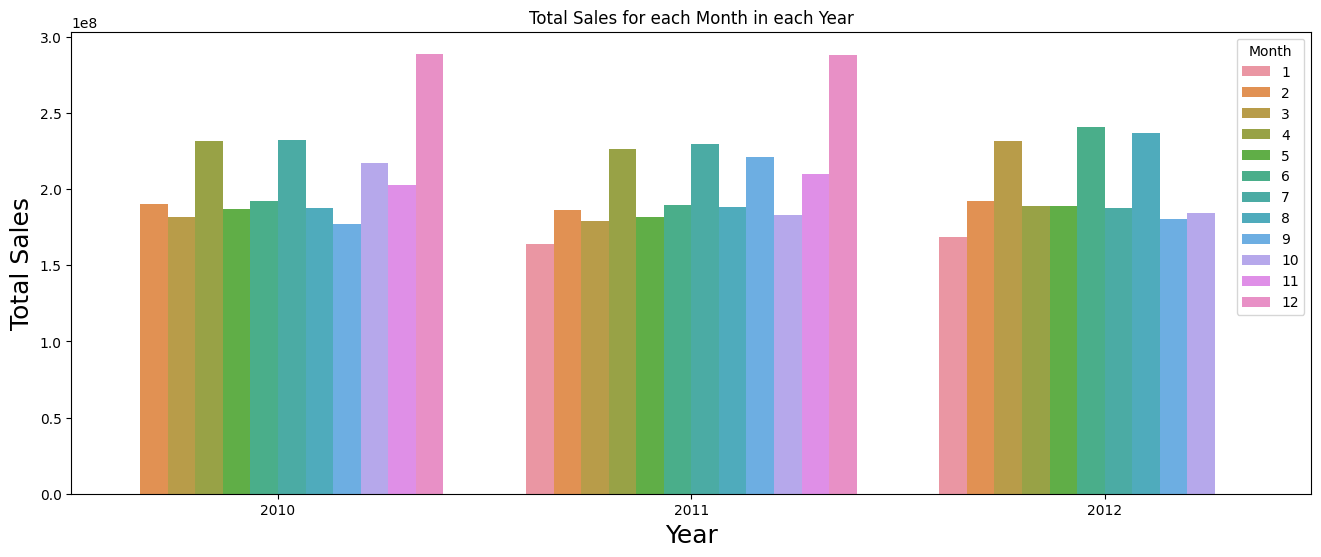

In [62]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df,
            x = 'Year',
            y = 'Weekly_Sales',
            hue = 'Month',
            estimator = np.sum,
            ci = False)

# Add labels and title
plt.title('Total Sales for each Month in each Year')
plt.xlabel('Year', size = 18)
plt.ylabel('Total Sales', size = 18)

plt.show()

In [63]:
pd.pivot_table(data=df,
               index='Year',
                columns='Quarter',
                 values="Weekly_Sales",
                 aggfunc='sum')

Quarter,1,2,3,4
Year,,,,
2010,3.722528e+08,6.103695e+08,5.974881e+08,7.087757e+08
2011,5.293917e+08,5.979481e+08,6.393585e+08,6.815017e+08
2012,5.924677e+08,6.182977e+08,6.050058e+08,1.843617e+08


/tmp/ipykernel_20/2892593501.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df,


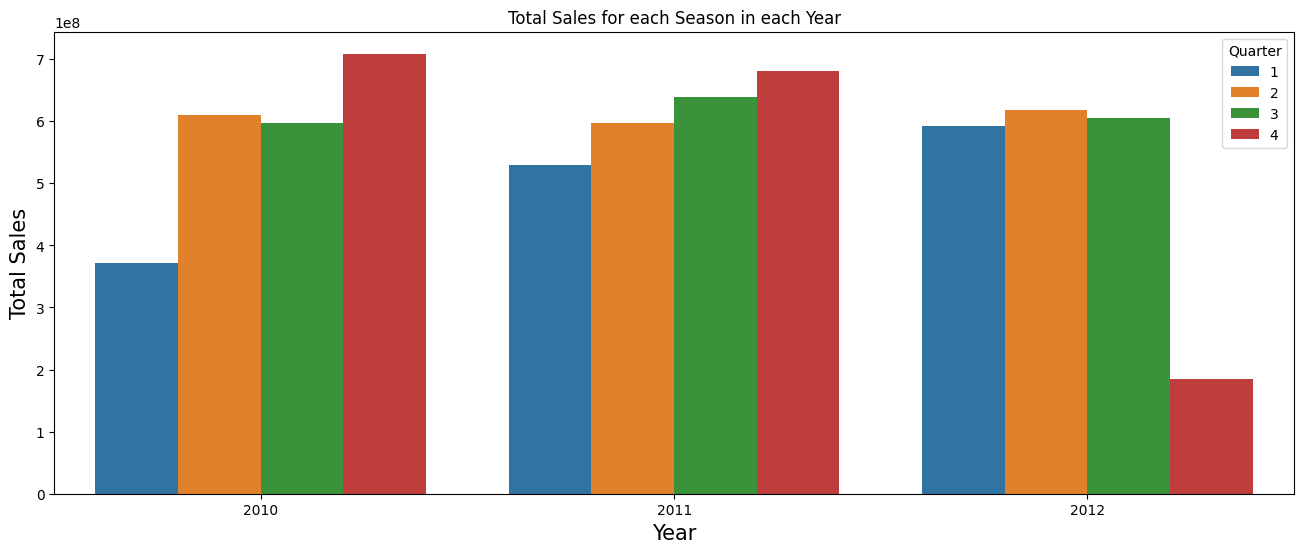

In [64]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df,
            x = 'Year',
            y = 'Weekly_Sales',
            hue = 'Quarter',
            estimator = np.sum,
           ci = False)

# Add labels and title
plt.title('Total Sales for each Season in each Year')
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show()

# Data Correlation

**Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

  - 1: Perfect positive linear correlation.
 -  0: No linear correlation, the two variables most likely do not affect each other.
-  1: Perfect negative linear correlation.

**

**P-Value**
**What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant.
p-value is < 0.05: there is moderate evidence that the correlation is significant.
p-value is < 0.1: there is weak evidence that the correlation is significant.
p-value is > 0.1: there is no evidence that the correlation is significant.**

**Fuel Price vs. Weekly Sales**

In [65]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'fuel_price' and 'weekly_sales':
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Fuel_Price'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.009463786314475135  with a P-value of P = 0.44782874894858093


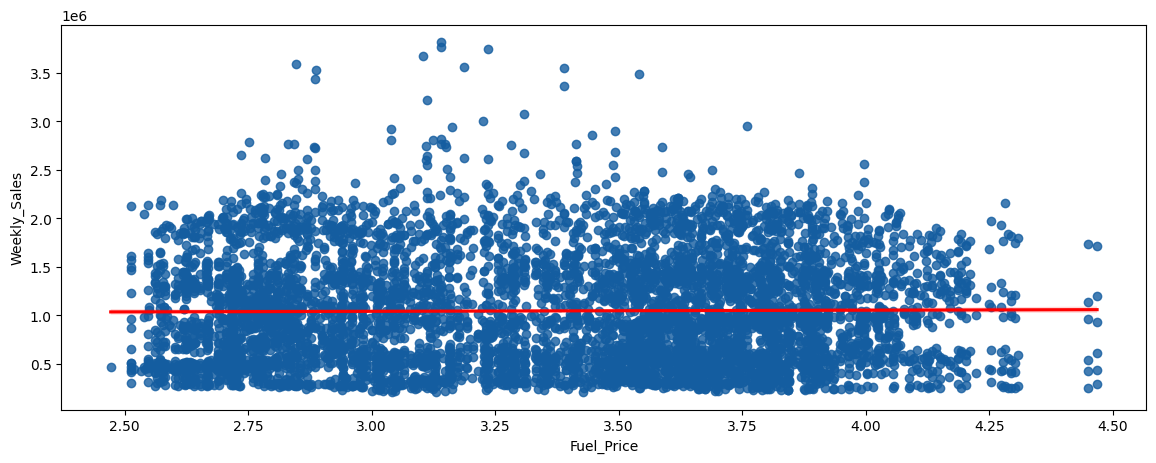

In [66]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Fuel_Price', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

**Since the p-value is > 0.1, the correlation between fuel price and weekly sales is not statistically significant.
Fuel price does not seem like a good predictor of the weekly sales at all since the regression line is close to horizontal. Therefore, it's not a reliable variable.**

**Unemployment vs. Weekly Sales**

In [67]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'unemployment' and 'weekly_sales':
pearson_coef, p_value = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.10617608965795423  with a P-value of P = 1.3448365210234661e-17


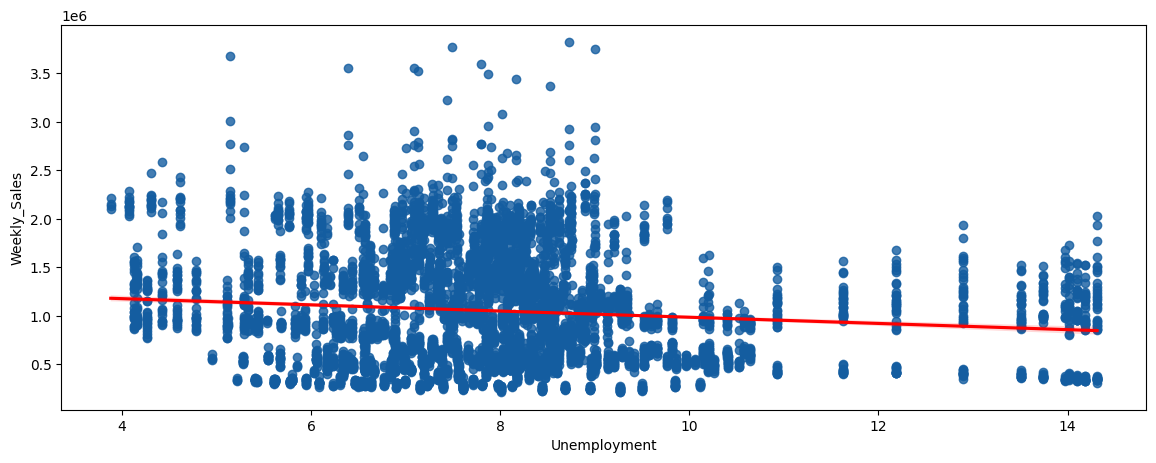

In [68]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Unemployment', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

** -Since the p-value is < 0.001, the correlation between unemployment and weekly sales is strong evidence that the correlation is significant.
-Unemployment seems like a good predictor of the weekly sales, The higher the unemployment rate, the lower the weekly sales.**

**CPI vs. Weekly Sales**

In [69]:
# Let's calculate the Pearson Correlation Coefficient and P-value of cpi' and 'weekly_sales':
pearson_coef, p_value = stats.pearsonr(df['CPI'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07263416204017623  with a P-value of P = 5.438292612176735e-09


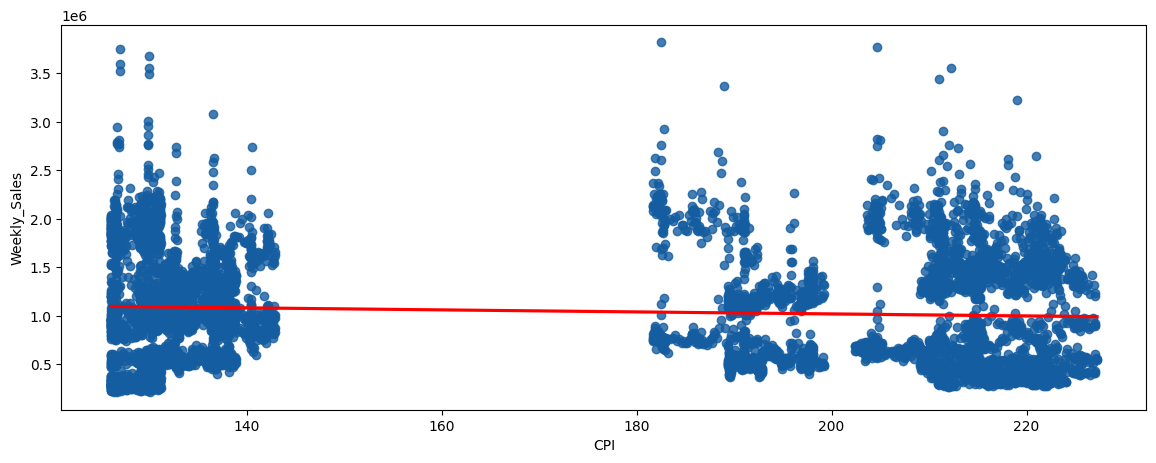

In [70]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'CPI', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

**Since the p-value is < 0.001, the correlation between CPI and weekly sales is strong evidence that the correlation is significant.**

**Temperature vs. Weekly Sales**

In [71]:
# Let's calculate the Pearson Correlation Coefficient and P-value of temperature' and 'weekly_sales':
pearson_coef, p_value = stats.pearsonr(df['Temperature'], df['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06381001317946956  with a P-value of P = 3.007647625833226e-07


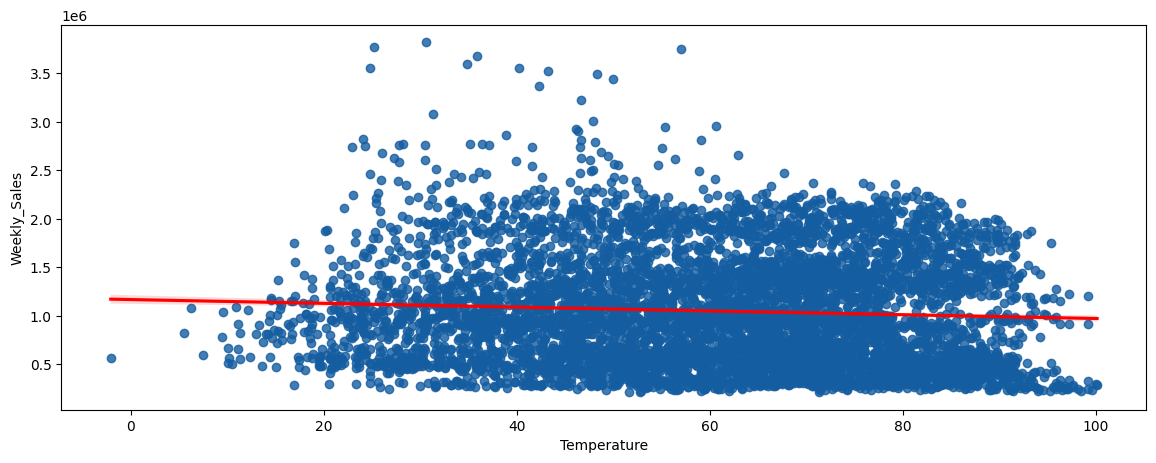

In [72]:
plt.figure(figsize = (14, 5))
sns.regplot(data = df, x = 'Temperature', y = 'Weekly_Sales', color = '#145DA0', line_kws = {'color': 'red'})
plt.show()

**Since the p-value is < 0.05, the correlation between temperature and weekly sales is moderate evidence that the correlation is significant.
Temperature seems like a good predictor of the weekly sales, The higher the Temperature rate, the lower the weekly sales.**

In [73]:
df["Temperature"].corr(df["Weekly_Sales"])

-0.06381001317946955

In [74]:
# Correlations with weekly sales
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Weekly_Sales
Weekly_Sales,1.000000
Fuel_Price,0.009464
Temperature,-0.063810
CPI,-0.072634
Unemployment,-0.106176


# Data Preprocessing

In [75]:
df_copy = df.copy()

** Dropping Unnecessary Columns¶
**

Let's drop columns 'date', 'year' and drop columns 'quarter' and 'month'since there are the same columns as 'season' and 'month_name'.

In the "day_of_week" column, Friday is the most frequent with 67.1% compared to other days, so the model will be biased to the class of Friday, so it prefers to drop this column to avoid underfitting.

In [76]:
df_copy.drop(['Date', 'Year', 'Quarter', 'Month', 'day_of_week'], axis = 1, inplace = True)


In [77]:
# Check the data types
df_copy.dtypes

Store             int64
Weekly_Sales    float64
Is_Holiday        int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
week             UInt32
month_name       object
season           object
dtype: object

In [78]:
# let's handle store and holiday columns as categorical features, so we should convert them into categories (objects).bb
df_copy['Store'] = df_copy['Store'].astype('object')
df_copy['Is_Holiday'] = df_copy['Is_Holiday'].astype('object')
df_copy['week'] = df_copy['week'].astype('object')

In [79]:
df_copy.dtypes


Store            object
Weekly_Sales    float64
Is_Holiday       object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
week             object
month_name       object
season           object
dtype: object

>   Detecting And Removing The Outliers¶


0 Fuel_Price
1 Temperature
2 CPI
3 Unemployment


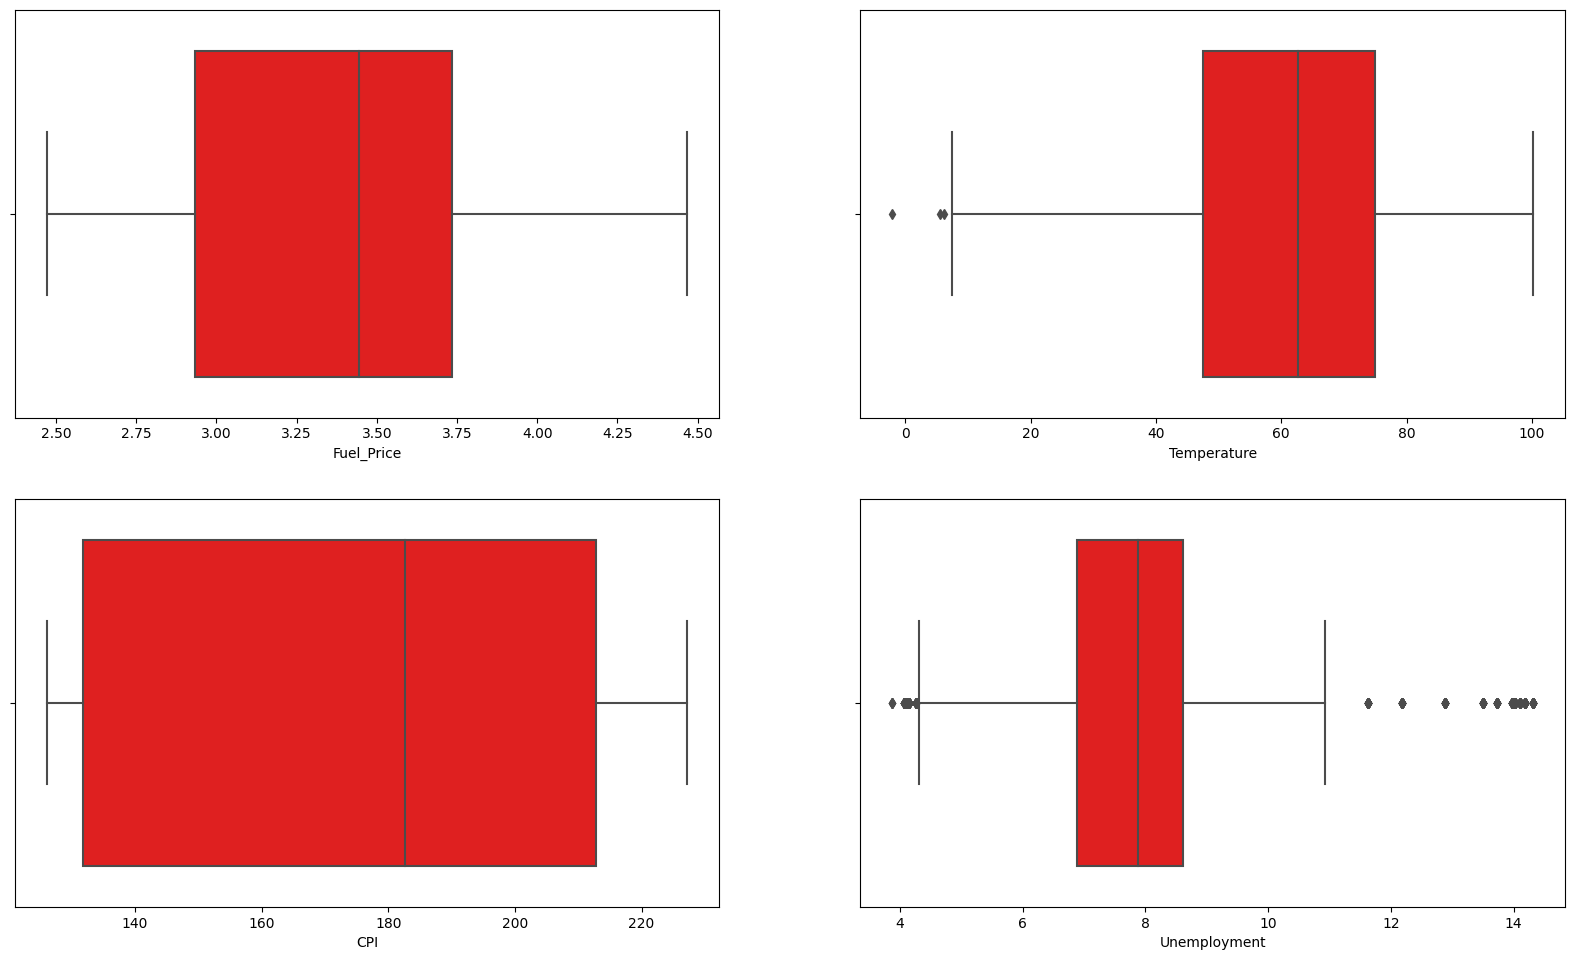

Number of data rows:  6435


In [80]:
cols = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df_copy, x = col, color = 'red')
plt.show()

print('Number of data rows: ', df_copy.shape[0])

In [81]:
# Remove outliers from the temperature column
df_copy.drop(df_copy[df_copy['Temperature'] < 7].index, axis = 0, inplace = True)

In [82]:
# Remove outliers from the unemployment column
df_copy.drop(df_copy[df_copy['Unemployment'] < 4.6].index, axis = 0, inplace = True)
df_copy.drop(df_copy[df_copy['Unemployment'] > 10.5].index, axis = 0, inplace = True)

0 Temperature
1 Fuel_Price
2 CPI
3 Unemployment


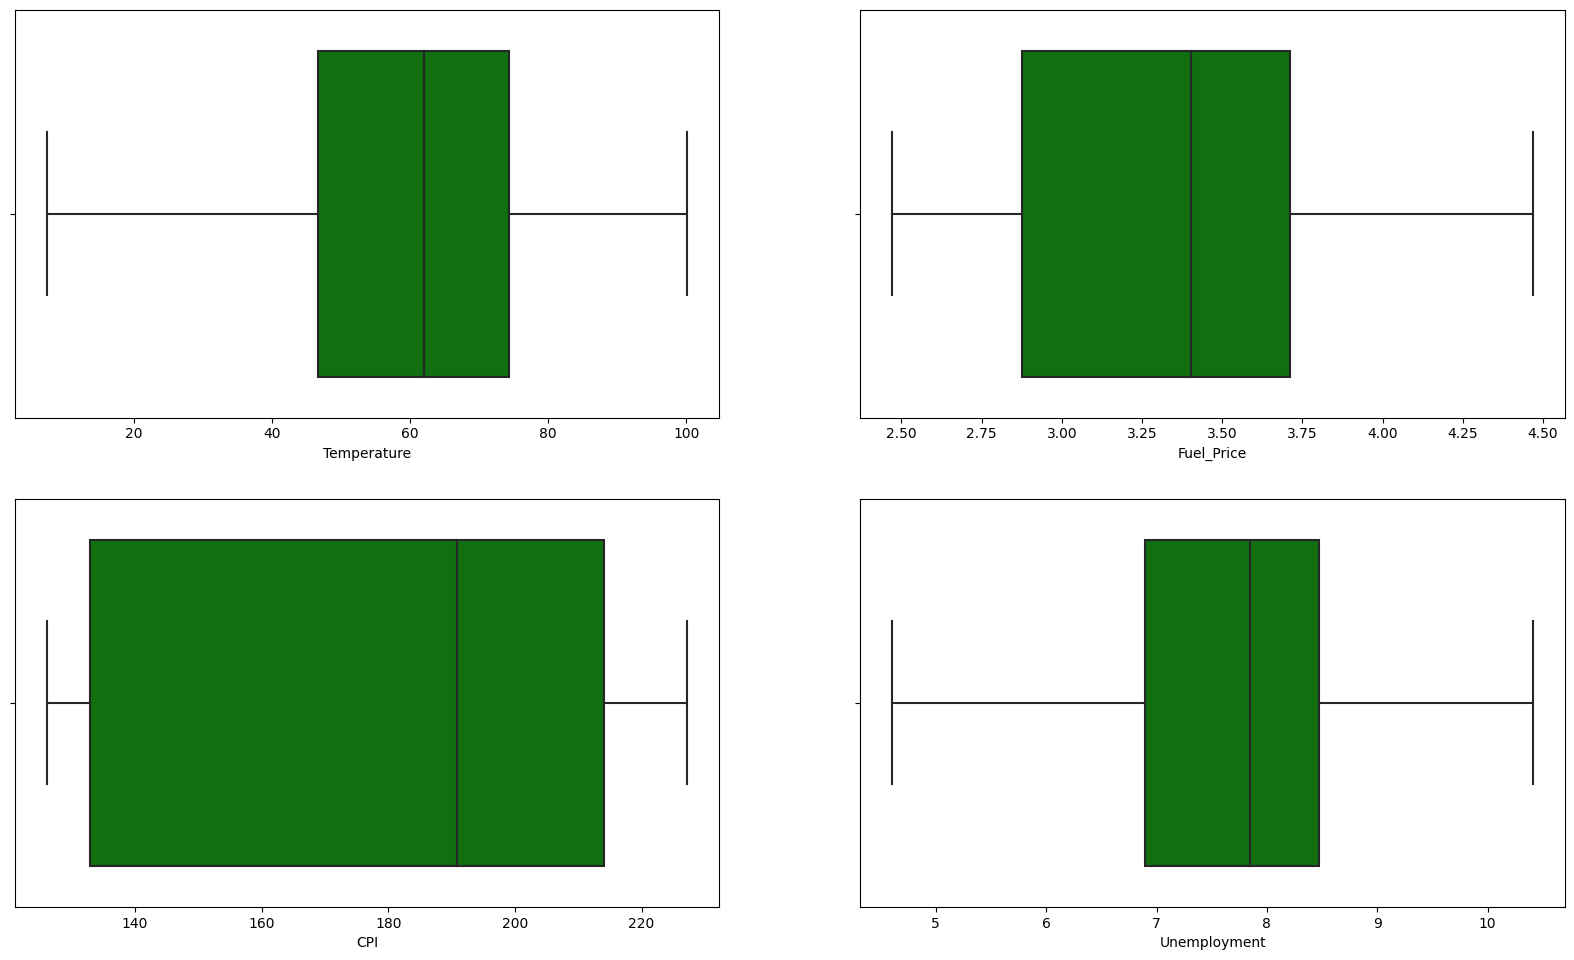

Number of data rows:  5777


In [83]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(df_copy, x = col, color = 'g')
plt.show()

print('Number of data rows: ', df_copy.shape[0])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X=df_copy.drop("Weekly_Sales",axis=1)
y=df_copy["Weekly_Sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [86]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5777, 9)
Shape of train data:  (4621, 9)
Shape of test data :  (1156, 9)


In [87]:
X_train

,Store,Is_Holiday,Temperature,Fuel_Price,CPI,Unemployment,week,month_name,season
4979,35,0,53.68,3.951,142.017793,8.876,18,May,Spring
387,3,0,51.86,3.261,223.375526,6.833,2,January,Winter
4772,34,1,28.66,3.033,127.859129,10.398,6,February,Winter
2555,18,0,70.92,3.629,138.162900,8.304,25,June,Spring
2512,18,0,70.32,3.796,136.213613,8.890,34,August,Summer
...,...,...,...,...,...,...,...,...,...
4167,30,0,87.01,2.653,210.995013,8.200,25,June,Spring
5822,41,0,31.56,3.055,196.779665,6.589,3,January,Winter
5857,41,0,59.81,3.765,198.358523,6.432,38,September,Summer
6021,43,0,74.74,2.826,202.621074,9.593,20,May,Spring


In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(4621, 9)
(1156, 9)
(4621,)


# Data Transformation

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [90]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5777 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5777 non-null   object 
 1   Weekly_Sales  5777 non-null   float64
 2   Is_Holiday    5777 non-null   object 
 3   Temperature   5777 non-null   float64
 4   Fuel_Price    5777 non-null   float64
 5   CPI           5777 non-null   float64
 6   Unemployment  5777 non-null   float64
 7   week          5777 non-null   object 
 8   month_name    5777 non-null   object 
 9   season        5777 non-null   object 
dtypes: float64(5), object(5)
memory usage: 496.5+ KB


In [91]:
# Splitting the data into Numerical Features and Categorical Features
num_features=df_copy.select_dtypes('number').columns.to_list()
num_features.remove("Weekly_Sales")

cat_features=df_copy.select_dtypes('object').columns.to_list()

print(num_features)
print(cat_features)

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
['Store', 'Is_Holiday', 'week', 'month_name', 'season']


In [92]:
# data transformation pipeline
preprocessor=ColumnTransformer([
                              ('num_features',StandardScaler(),num_features),
                              ('cat_features',BinaryEncoder(),cat_features),
])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Is_Holiday', 'week', 'month_name',
                                  'season'])])

In [93]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

# Modelling

In [94]:
def model_evaluation(estimator, Training_Testing, X, y):

    ''' This function is used to evaluate the model through RMSE and R2'''

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'-> R-Squere score Training: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [95]:
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

In [96]:
 def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''
    
    
    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


**Linear regression**

In [98]:
Lr=LinearRegression()
Lr.fit(X_train_transformed,y_train)

LinearRegression()

In [99]:
# Training Accuracy
model_evaluation(Lr, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 510094.49
-> R-Squere score Training: 21.99 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

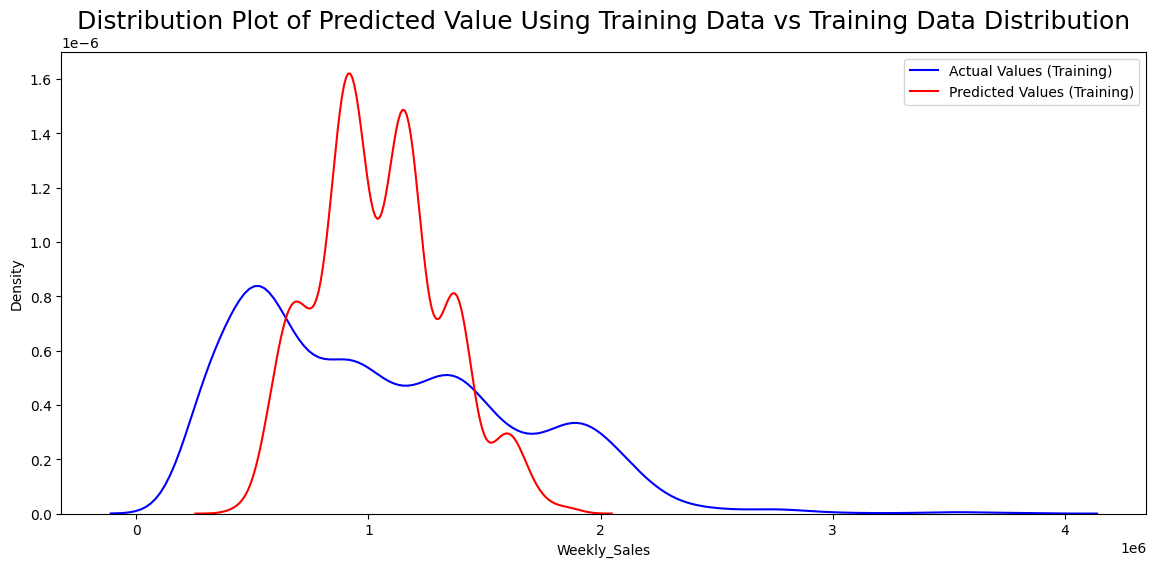

In [100]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Lr, 'Training', X_train_transformed, y_train, Title)

Since there are no linear correlations between variables and targets, The model seems to be not doing well in learning from the training dataset, so we need to increase the complexity of this model. let's do Polynomial Features for the data before modeling.

In [101]:
# Polynomial Regression Model
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

best_estimator = hyperparameter_tunning(LR_pipe, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.9560186412144211


In [102]:
# Linear Regression Model after tuning
poly_reg = best_estimator

In [103]:
# Training Accuracy Afer tuning
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 71027.76
-> R-Squere score Training: 98.49 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

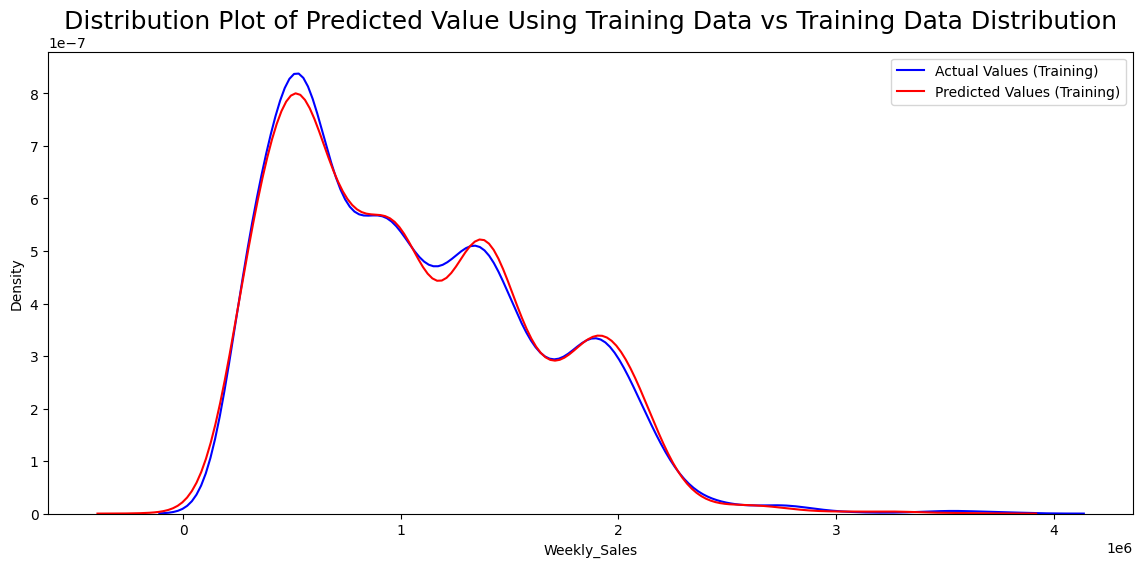

In [104]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(poly_reg, 'Training', X_train_transformed, y_train, Title)

In [105]:
model_evaluation(poly_reg,'Testing',X_test_transformed,y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 102363.31
-> R-Squere score Training: 96.7 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

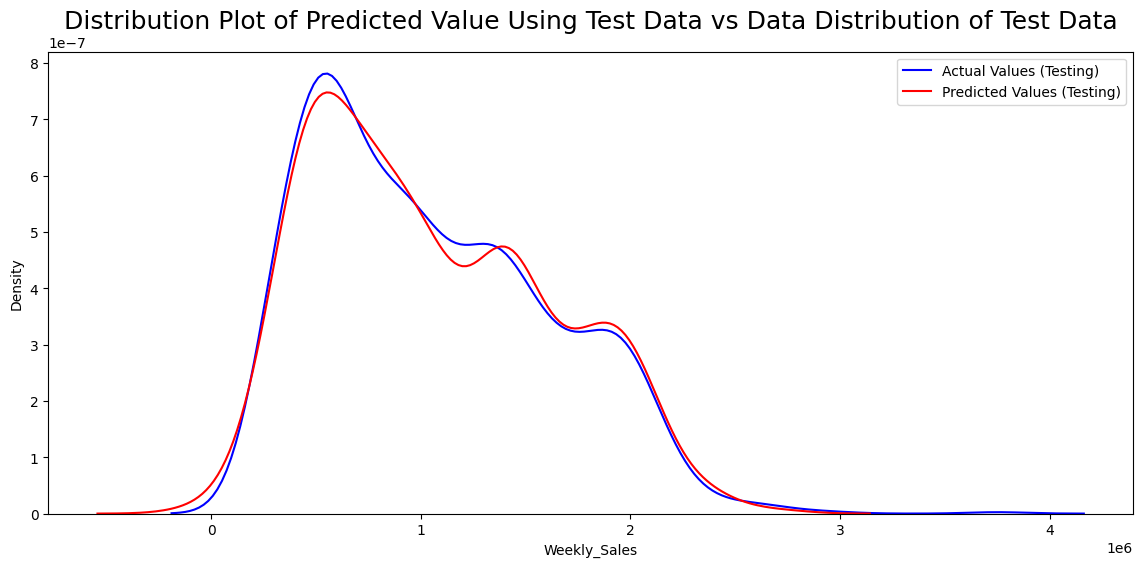

In [106]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(poly_reg, 'Testing', X_test_transformed, y_test, Title)

After testing the polynomial regression model, it became clear that the model had learned sufficiently, as its accuracy was 96.7 %.

**KNN Regressor**

In [107]:
Knn_reg=KNeighborsRegressor(n_neighbors=5)
Knn_reg.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [108]:
model_evaluation(Knn_reg,'Training',X_train_transformed,y_train)

Training Accuracy: 

-> Root Mean Squared Error: 342686.12
-> R-Squere score Training: 64.79 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

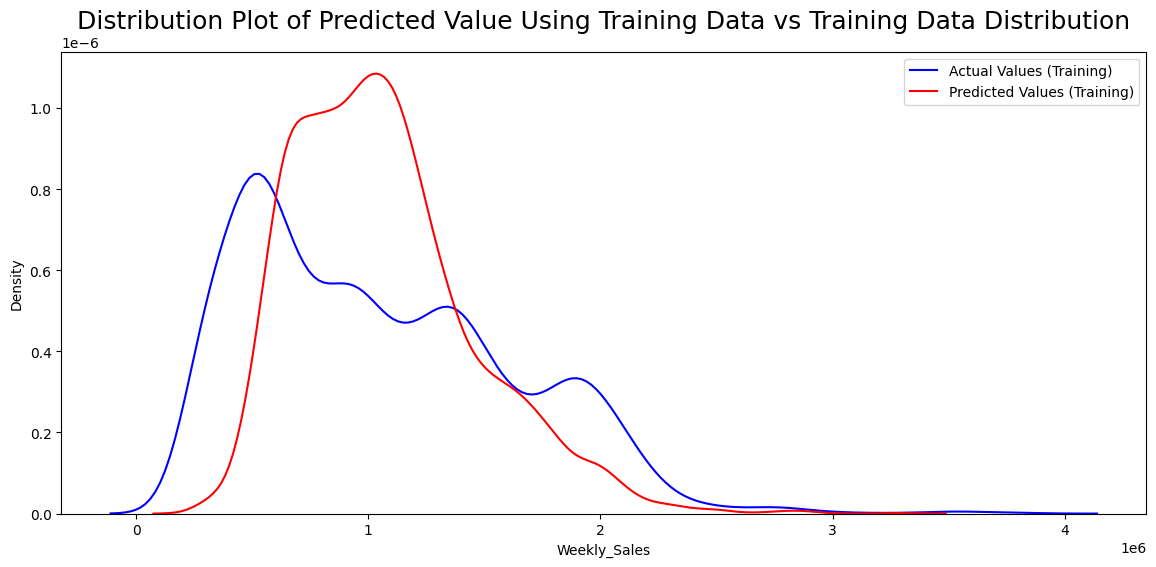

In [109]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Knn_reg, 'Training', X_train_transformed, y_train, Title)

In [110]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 13]}

best_estimator = hyperparameter_tunning(Knn_reg, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_KNN = best_estimator

Best parameters: {'n_neighbors': 8} 

Best score: 0.4660972479519761


In [111]:
# Training Accuracy Afer tuning
model_evaluation(Best_KNN, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 360636.14
-> R-Squere score Training: 61.0 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

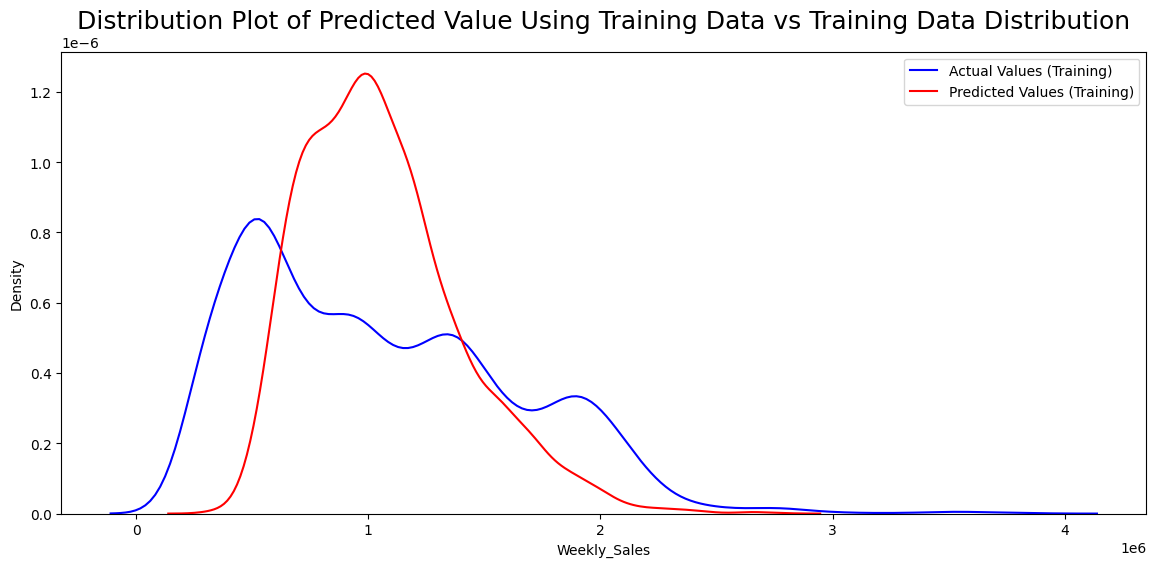

In [112]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_KNN, 'Training', X_train_transformed, y_train, Title)

In [113]:
# Testing Accuracy
model_evaluation(Best_KNN, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 397641.67
-> R-Squere score Training: 50.25 % 



After testing the KNN Regressor model, it became clear that it is a bad model with an accuracy of 50.25 % in comparison to the above algorithm we used (Linear Regression).

**Decision Tree Regressor**

In [114]:
Dt=DecisionTreeRegressor()
Dt.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [115]:
model_evaluation(Dt,'Trainig',X_train_transformed,y_train)

Trainig Accuracy: 

-> Root Mean Squared Error: 0.0
-> R-Squere score Training: 100.0 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

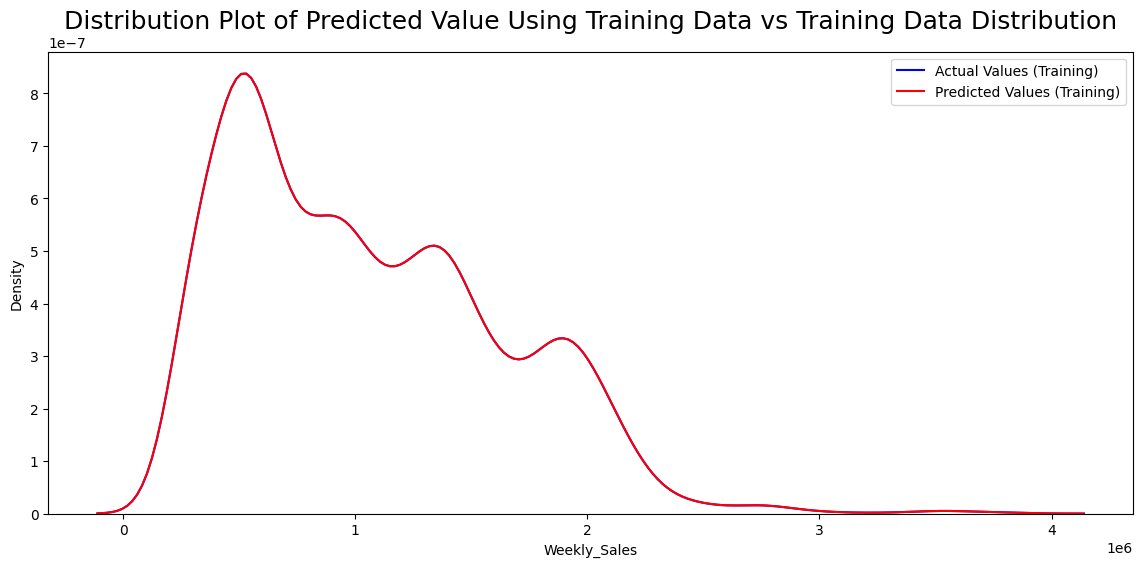

In [116]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Dt, 'Training', X_train_transformed, y_train, Title)

The model has overfitting, so let's improve it by tuning the hyperparameters.

In [117]:
param_grid={'max_depth':np.arange(2,15),
            'min_samples_split': [10, 20, 30, 40, 50, 100, 200, 300]}

best_estimator = hyperparameter_tunning(Dt, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_Tree = best_estimator

Best parameters: {'max_depth': 10, 'min_samples_split': 40} 

Best score: 0.9191656905808643


In [118]:
model_evaluation(Best_Tree,'Training',X_test_transformed,y_test)

Training Accuracy: 

-> Root Mean Squared Error: 147938.8
-> R-Squere score Training: 93.11 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

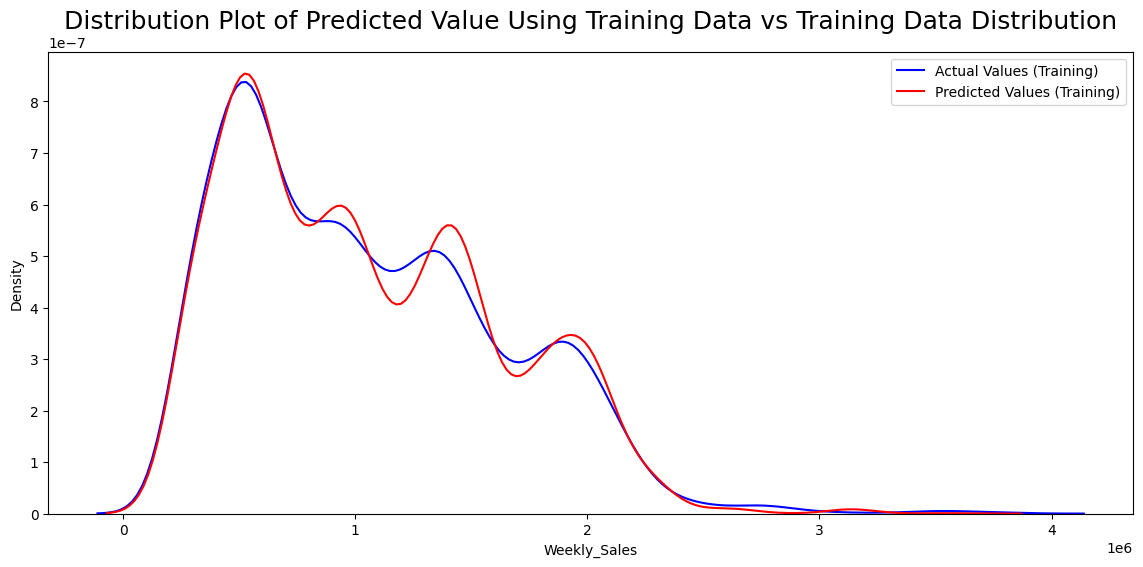

In [119]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_Tree, 'Training', X_train_transformed, y_train, Title)

In [120]:
model_evaluation(Best_Tree, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 147938.8
-> R-Squere score Training: 93.11 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

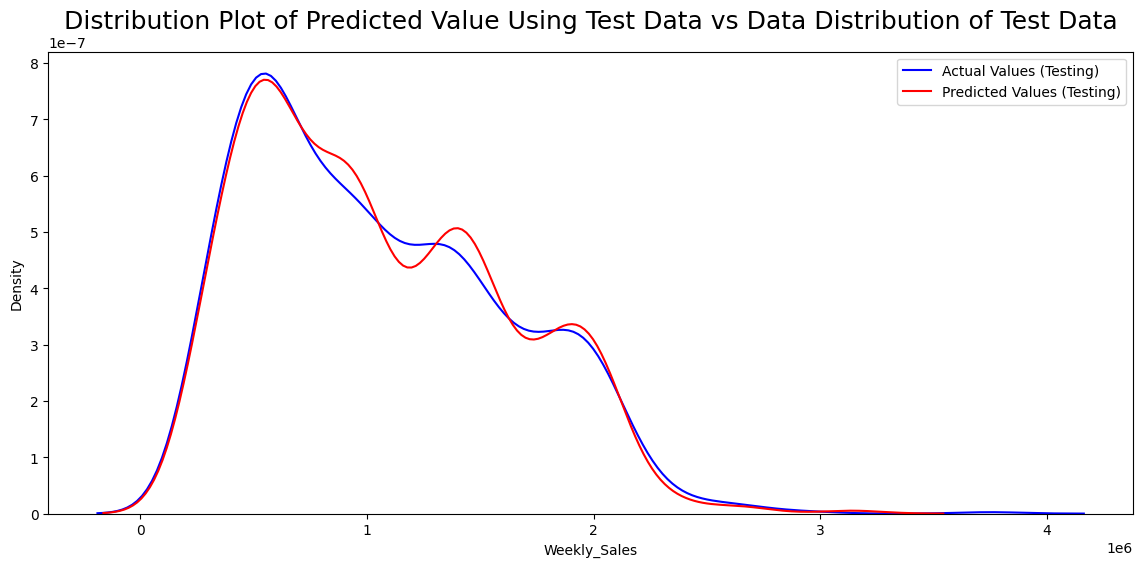

In [121]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Best_Tree, 'Testing', X_test_transformed, y_test, Title)

**Random Forest Regressor**

In [122]:
# Random Forest regressor Model
rf = RandomForestRegressor()
rf.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [123]:
# Training Accuracy
model_evaluation(rf, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 48679.16
-> R-Squere score Training: 99.29 % 



/tmp/ipykernel_20/2085724386.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
/tmp/ipykernel_20/2085724386.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(yhat, hist = False, color

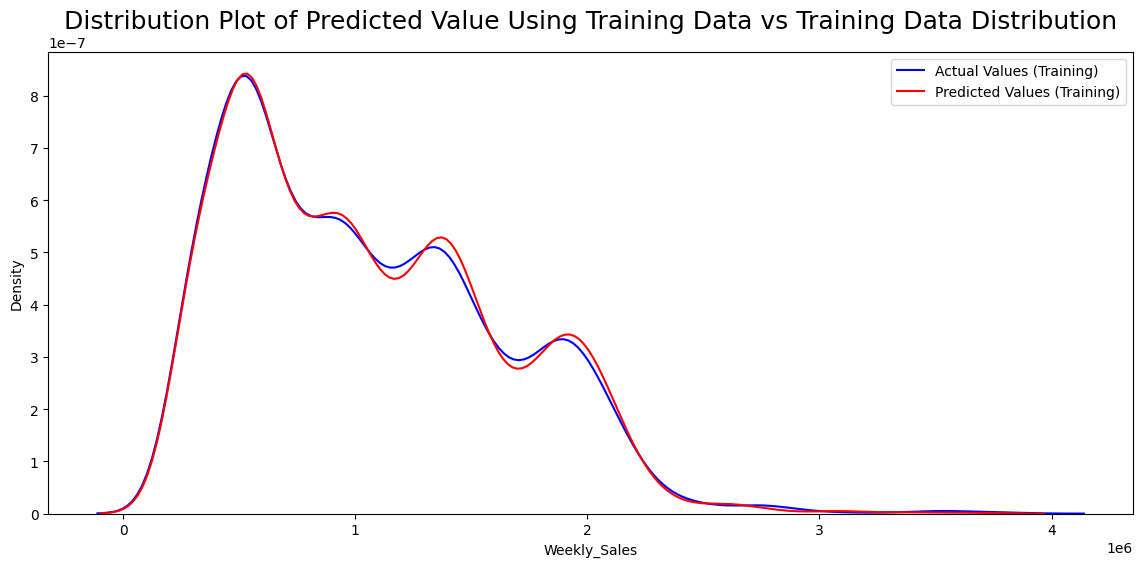

In [124]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(rf, 'Training', X_train_transformed, y_train, Title)

In [125]:
# Testing Accuracy
model_evaluation(rf, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 120547.29
-> R-Squere score Training: 95.43 % 



# Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models,
- the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models,
- the model with the smallest MSE value is a better fit for the data.

# Conclusions
- Sales tend to be higher in Summer.

- The rate of sales on holidays is higher than on other days.

- There is a high variance in weekly sales from one store to another.

- Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.

- Comparing these four models, we conclude that The Linear Regression Model is the best model with an accuracy of 96.84 % to be able to predict weekly sales from our dataset.